# Throughput

## Import Data

In [1]:
import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns

sns.set(style="whitegrid")

In [10]:
data_frames = []

for file in glob.glob("*_1.orun.summary.bench"):
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        df = pdjson.json_normalize(data)
        df['variant'] = file.replace("_1.orun.summary.bench","")
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name']) 
# Uncomment the following to display all the lines in pandas output
pd.set_option('display.max_rows', df.shape[0]+1)
df

<ipython-input-10-da316fd22ae6>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = pdjson.json_normalize(data)


,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions
30,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.172507,4.164195,0.008000,38004,68784.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,4194789,8217,2,0,4231434,4231434,3.493154,4.12.0+domains+effects,NaN,NaN
30,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.208896,4.184575,0.024003,38020,68443.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,4194788,8217,2,0,4231434,4231434,3.493252,4.12.0+domains,NaN,NaN
30,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,3.992732,3.980335,0.012001,29764,53408.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,4194470,8218,4,1,5790208,5790208,NaN,4.12.0+stock,4.0,0.0
22,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.186367,2.009925,0.176168,352448,2381362.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,45742619,698,13,0,49342464,49342464,NaN,4.12.0+stock,37.0,0.0
22,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.489923,2.317506,0.172111,425712,2861684.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,60775047,653,17,0,51724355,52387907,5.557004,4.12.0+domains,NaN,NaN
22,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.435974,2.220364,0.215299,425820,2865246.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,60772220,653,17,0,51724355,52392003,5.562770,4.12.0+domains+effects,NaN,NaN
48,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,17.967966,17.763578,0.203689,314112,2861684.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,83349935,7820,27,0,37667141,37667141,26.817596,4.12.0+domains,NaN,NaN
48,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,17.522478,17.365915,0.156017,282372,2381362.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,60383767,7885,21,0,37309440,37309440,NaN,4.12.0+stock,35.0,0.0
48,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,18.127793,17.919805,0.207070,318804,2865246.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,83490691,7824,27,0,38256313,38256313,25.384060,4.12.0+domains+effects,NaN,NaN
51,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.535931,5.523549,0.011999,22332,163737.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,2484410,4695,10,0,2023316,2088855,23.964397,4.12.0+domains,NaN,NaN


### Drop some benchmarks


In [11]:
df = df[(df.name != 'alt-ergo.fill.why') &         #multicore version does not exist
        (df.name != 'alt-ergo.yyll.why') &         #multicore version does not exist
        (df.name != 'frama-c.slevel') &            #multicore version does not exist
        (df.name != 'js_of_ocaml.frama-c_byte')]   #multicore version does not exist
throughput_df = df
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions
30,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.172507,4.164195,0.008000,38004,68784.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,4194789,8217,2,0,4231434,4231434,3.493154,4.12.0+domains+effects,NaN,NaN
30,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.208896,4.184575,0.024003,38020,68443.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,4194788,8217,2,0,4231434,4231434,3.493252,4.12.0+domains,NaN,NaN
30,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,3.992732,3.980335,0.012001,29764,53408.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,4194470,8218,4,1,5790208,5790208,NaN,4.12.0+stock,4.0,0.0
51,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.535931,5.523549,0.011999,22332,163737.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,2484410,4695,10,0,2023316,2088855,23.964397,4.12.0+domains,NaN,NaN
51,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.753604,5.745245,0.008001,22320,164078.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,2484411,4695,10,0,2023316,2088855,24.373023,4.12.0+domains+effects,NaN,NaN
51,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,5.444747,5.428443,0.016001,21300,139047.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,2463349,4689,9,0,2264576,2264576,NaN,4.12.0+stock,15.0,0.0
34,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,11.812804,11.720393,0.092003,146896,282776.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,280602992,3565,69,0,15790334,18088190,38.770469,4.12.0+domains+effects,NaN,NaN
34,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,12.671440,12.567133,0.103992,154912,231416.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,270986958,3527,63,1,18974208,18974208,NaN,4.12.0+stock,33.0,0.0
34,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,12.176104,12.119641,0.055998,147088,282368.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,280602991,3565,69,0,15790334,18088190,38.770489,4.12.0+domains,NaN,NaN
12,chameneos_redux_lwt.600000,taskset --cpu-list 5 ./chameneos_redux_lwt.exe...,2.158712,1.798729,0.359745,6476,334745.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,790075,2188,203,1,61440,188416,NaN,4.12.0+stock,1.0,2.0


### Selection example

```
select * from df where variant = '4.10.0+trunk' and time_secs > 10
```

In [12]:
df.loc[(df['variant'] == '4.12.0+stock') & (df['time_secs'] > 10)]

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions
34,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,12.671440,12.567133,0.103992,154912,231416.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,270986958,3527,63,1,18974208,18974208,NaN,4.12.0+stock,33.0,0.0
24,coq.AbstractInterpretation.v,taskset --cpu-list 5 coqc benchmarks/coq/Abstr...,297.097246,296.326880,0.767986,597988,4964253.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,660728987,272701,70,4,69594112,69594112,NaN,4.12.0+stock,38.0,0.0
54,coq.BasicSyntax.v,taskset --cpu-list 5 coqc benchmarks/coq/Basic...,106.372304,106.115324,0.255998,358680,4964253.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,328885058,90052,42,0,45758976,45758976,NaN,4.12.0+stock,35.0,0.0
16,cpdf.scale,taskset --cpu-list 5 cpdf scale-to-fit a4lands...,14.065055,13.852596,0.212009,272736,968794.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,95488721,2269,32,3,33186816,33186816,NaN,4.12.0+stock,37.0,0.0
4,cpdf.squeeze,taskset --cpu-list 5 cpdf -squeeze benchmarks/...,16.889252,16.648774,0.240011,356832,968794.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,139917474,1622,34,4,43890176,43890176,NaN,4.12.0+stock,39.0,0.0
21,cubicle.german_pfs.cub,taskset --cpu-list 5 cubicle benchmarks/cubicl...,229.491193,229.124725,0.363992,468240,1020756.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,3250599021,84691,373,2,58503168,58503168,NaN,4.12.0+stock,32.0,0.0
8,cubicle.szymanski_at.cub,taskset --cpu-list 5 cubicle benchmarks/cubicl...,510.888979,510.806749,0.076708,139952,1020756.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,6371389238,405906,1534,0,16629248,16629248,NaN,4.12.0+stock,23.0,0.0
6,evolutionary_algorithm.10000_10000,taskset --cpu-list 5 ./evolutionary_algorithm....,74.755595,72.818505,1.935960,2810612,142626.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,1300975389,14252,34,3,357150208,357150208,NaN,4.12.0+stock,54.0,0.0
52,fannkuchredux.12,taskset --cpu-list 5 ./fannkuchredux.exe 12,98.138779,98.137729,0.000000,4780,231708.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,0,0,0,0,126976,126976,NaN,4.12.0+stock,1.0,0.0
31,fannkuchredux2.12,taskset --cpu-list 5 ./fannkuchredux2.exe 12,87.313493,87.308547,0.003999,4868,231770.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,0,0,0,0,126976,126976,NaN,4.12.0+stock,1.0,0.0


In [13]:
df.loc[df['name'] == 'LU_decomposition.1024']

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions
30,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.172507,4.164195,0.008000,38004,68784.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,4194789,8217,2,0,4231434,4231434,3.493154,4.12.0+domains+effects,NaN,NaN
30,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.208896,4.184575,0.024003,38020,68443.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,4194788,8217,2,0,4231434,4231434,3.493252,4.12.0+domains,NaN,NaN
30,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,3.992732,3.980335,0.012001,29764,53408.0,https://github.com/ocaml/ocaml/archive/refs/ta...,4.12.0,gcc,...,4194470,8218,4,1,5790208,5790208,NaN,4.12.0+stock,4.0,0.0


### Projection example

```
select name, variant, time_secs from df
```

In [14]:
df.filter(['name','variant','time_secs'])

,name,variant,time_secs
30,LU_decomposition.1024,4.12.0+domains+effects,4.172507
30,LU_decomposition.1024,4.12.0+domains,4.208896
30,LU_decomposition.1024,4.12.0+stock,3.992732
51,bdd.26,4.12.0+domains,5.535931
51,bdd.26,4.12.0+domains+effects,5.753604
51,bdd.26,4.12.0+stock,5.444747
34,binarytrees5.21,4.12.0+domains+effects,11.812804
34,binarytrees5.21,4.12.0+stock,12.671440
34,binarytrees5.21,4.12.0+domains,12.176104
12,chameneos_redux_lwt.600000,4.12.0+stock,2.158712


## Time

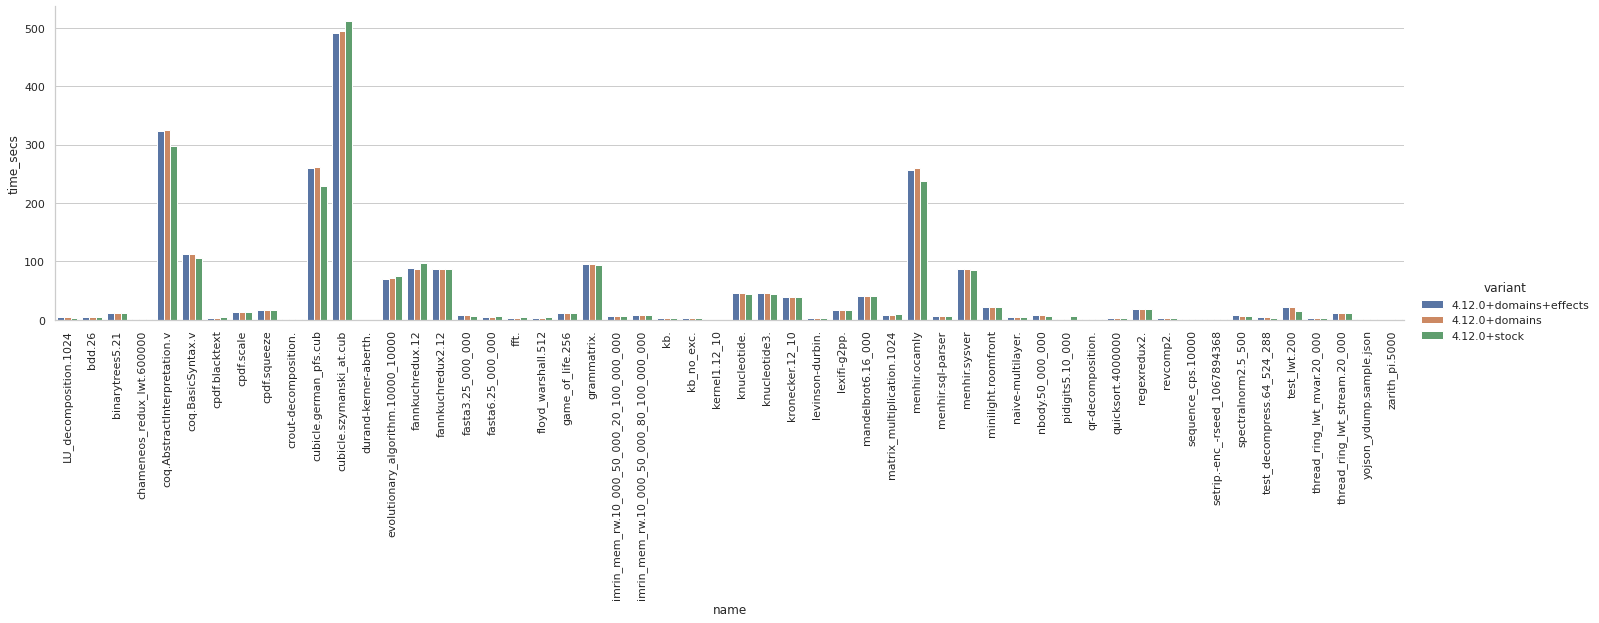

In [15]:
g = sns.catplot (x='name', y='time_secs', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [17]:
# returns a dictionary with {key = name : value : metric}
# the metric corresponds to the variant
def create_column(df, variant, metric):
    df = pd.DataFrame.copy(df)
    variant_metric_name = list([ zip(df[metric], df[x], df['name']) 
              for x in df.columns.array if x == "variant" ][0])
    name_metric = {n:t for (t, v, n) in variant_metric_name if v == variant}
#     print(name_metric)
    return name_metric

def add_display_name(df,variant, metric):
    name_metric = create_column(pd.DataFrame.copy(df), variant, metric)
#     print(name_metric)
    disp_name = [name+" ("+str(round(name_metric[name], 2))+")" for name in df["name"]]
    df["display_name"] = pd.Series(disp_name, index=df.index)
    return df

def normalise(df,variant,topic,additionalTopics=[]):
    df = add_display_name(df,variant,topic)
    df = df.sort_values(["name","variant"])
    grouped = df.filter(items=['name',topic,'variant','display_name']+additionalTopics).groupby('variant')
    ndata_frames = []
    for group in grouped:
        (v,data) = group
        if(v != variant):
            data['b'+topic] = grouped.get_group(variant)[topic].values
            data[['n'+topic]] = data[[topic]].div(grouped.get_group(variant)[topic].values, axis=0)
            for t in additionalTopics:
#                 print(variant, t)
                data[[t]] = grouped.get_group(variant)[t].values
            ndata_frames.append(data)
    df = pd.concat (ndata_frames)
    return df

def plot_normalised(df,variant,topic):
    df = pd.DataFrame.copy(df)
    df.sort_values(by=[topic],inplace=True)
    df[topic] = df[topic] - 1
    g = sns.catplot (x="display_name", y=topic, hue='variant', data = df, kind ='bar', aspect=4, bottom=1)
    g.set_xticklabels(rotation=90)
    g.ax.legend(loc=8)
    g._legend.remove()
    g.ax.set_xlabel("Benchmarks")
    return g
    # g.ax.set_yscale('log')

<ipython-input-17-890d57e0b3eb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


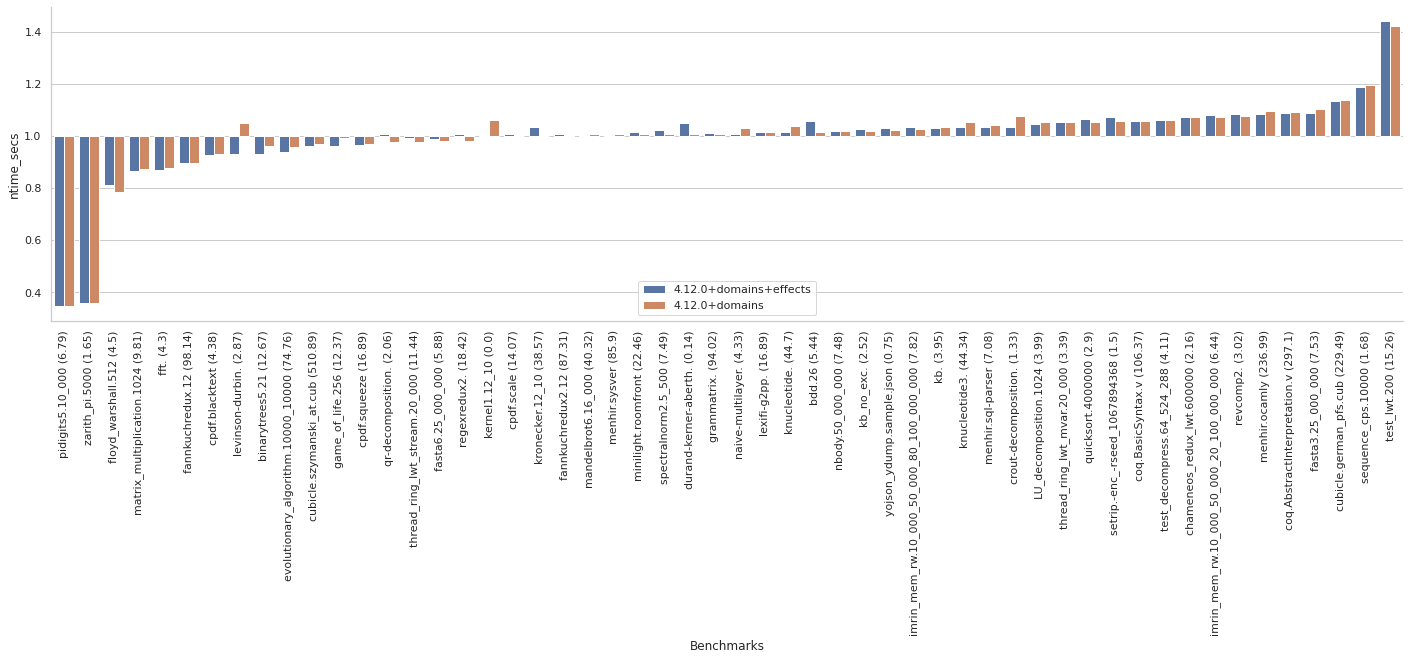

In [18]:
ndf = normalise(df,'4.12.0+stock','time_secs')
plot_normalised(ndf,'4.12.0+stock','ntime_secs')

## Top heap words

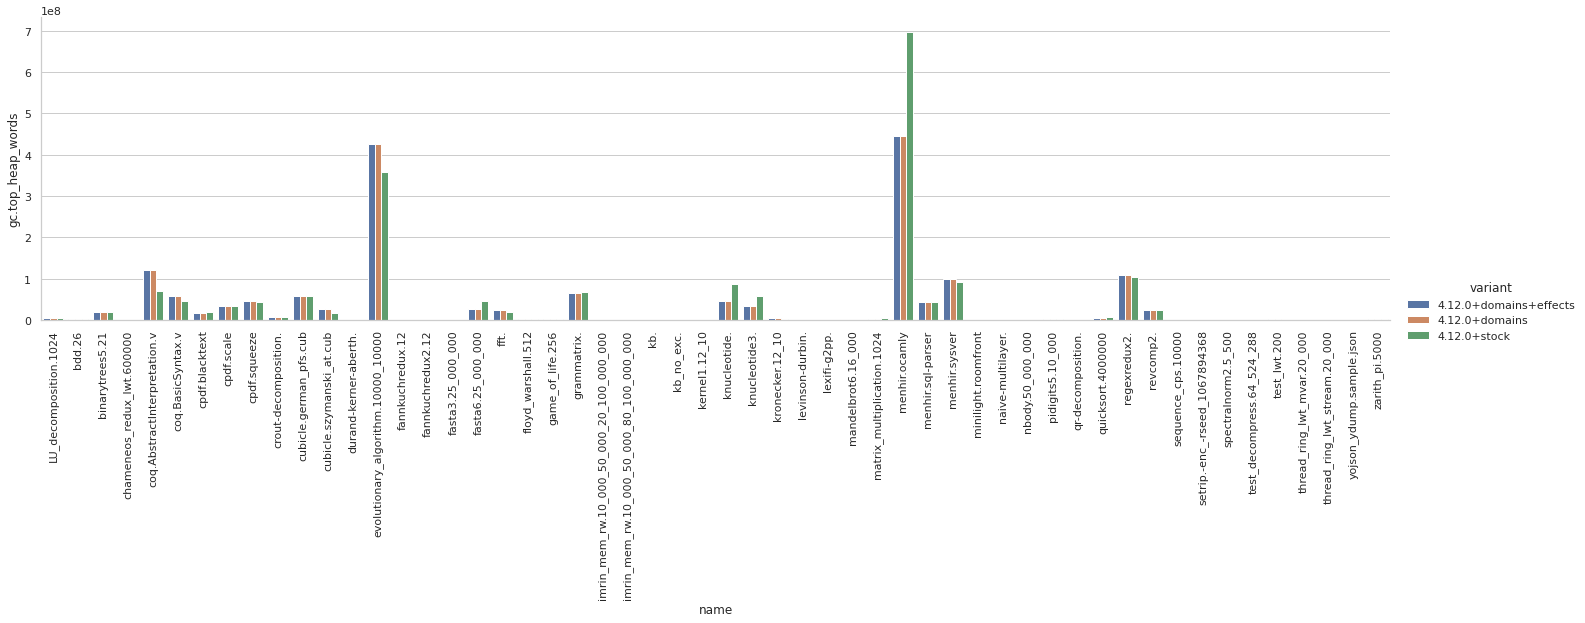

In [20]:
g = sns.catplot (x='name', y='gc.top_heap_words', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

<ipython-input-17-890d57e0b3eb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


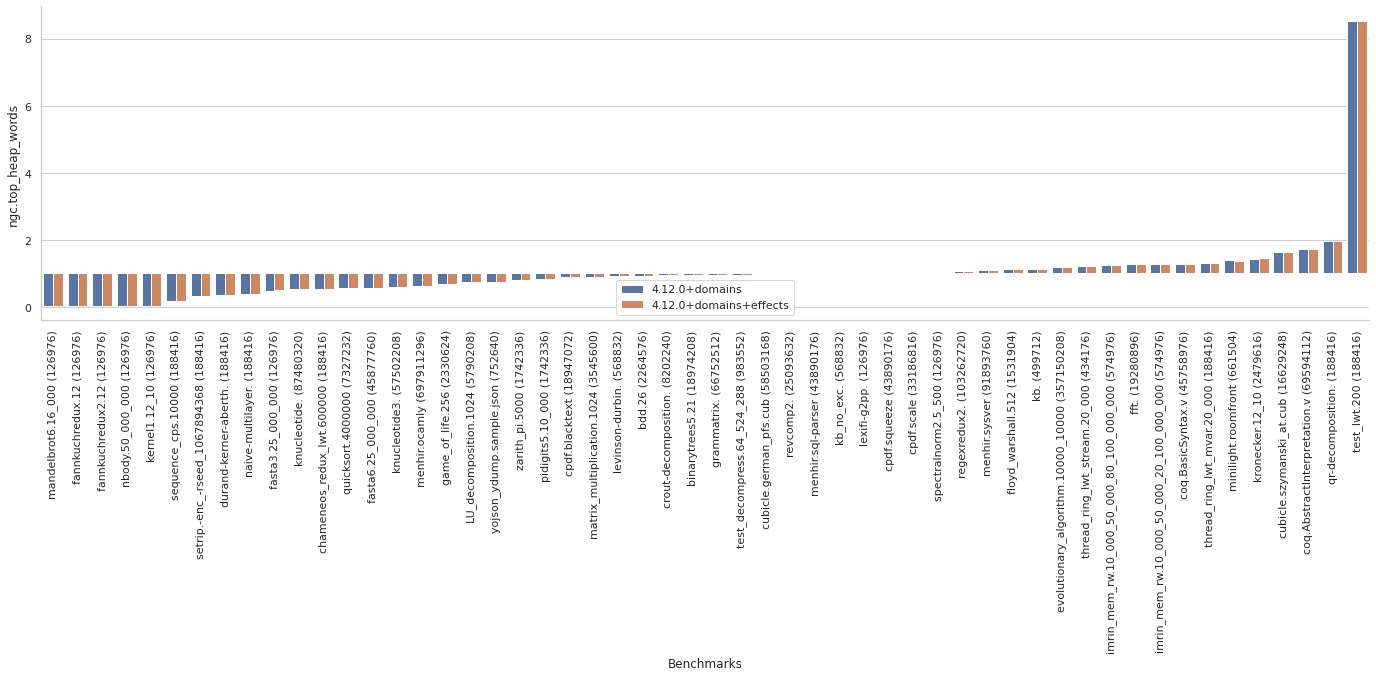

In [19]:
ndf = normalise(df,'4.12.0+stock','gc.top_heap_words')
plot_normalised(ndf,'4.12.0+stock','ngc.top_heap_words')

## Max RSS (KB)

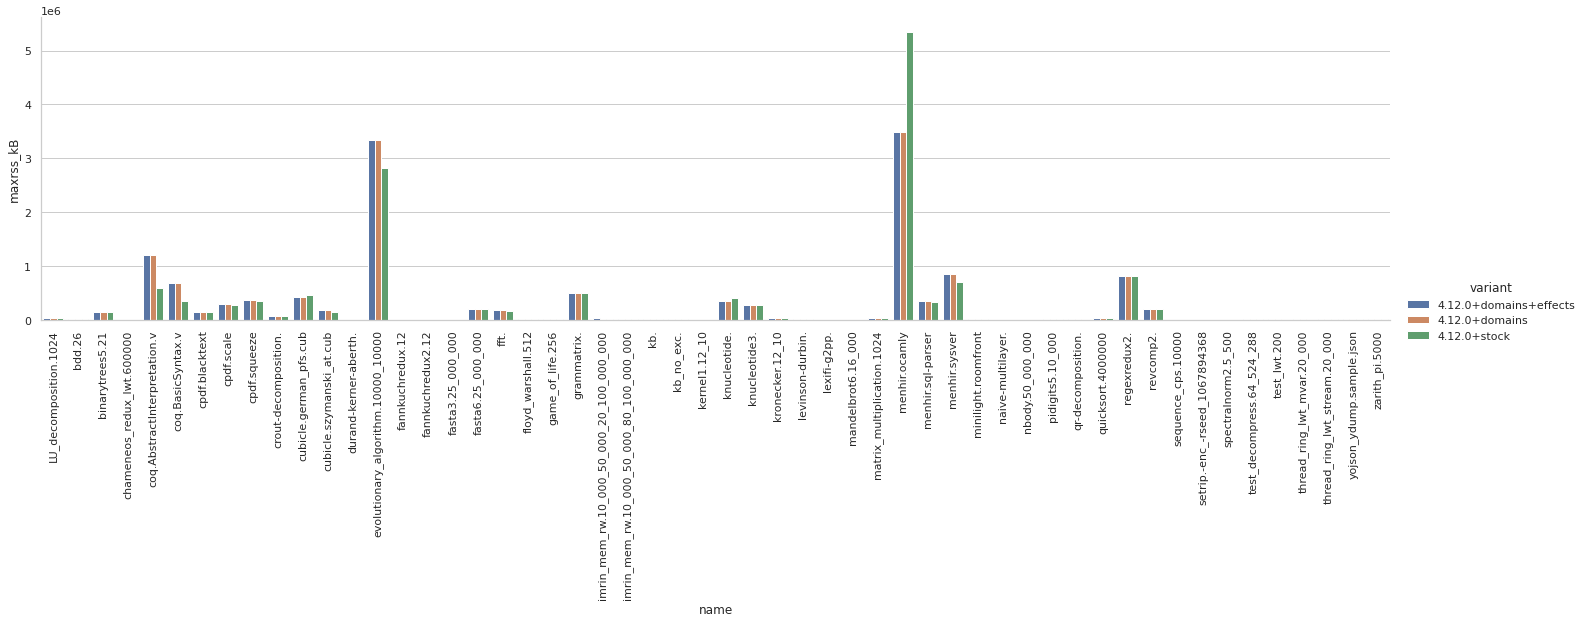

In [21]:
g = sns.catplot (x='name', y='maxrss_kB', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

<ipython-input-17-890d57e0b3eb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


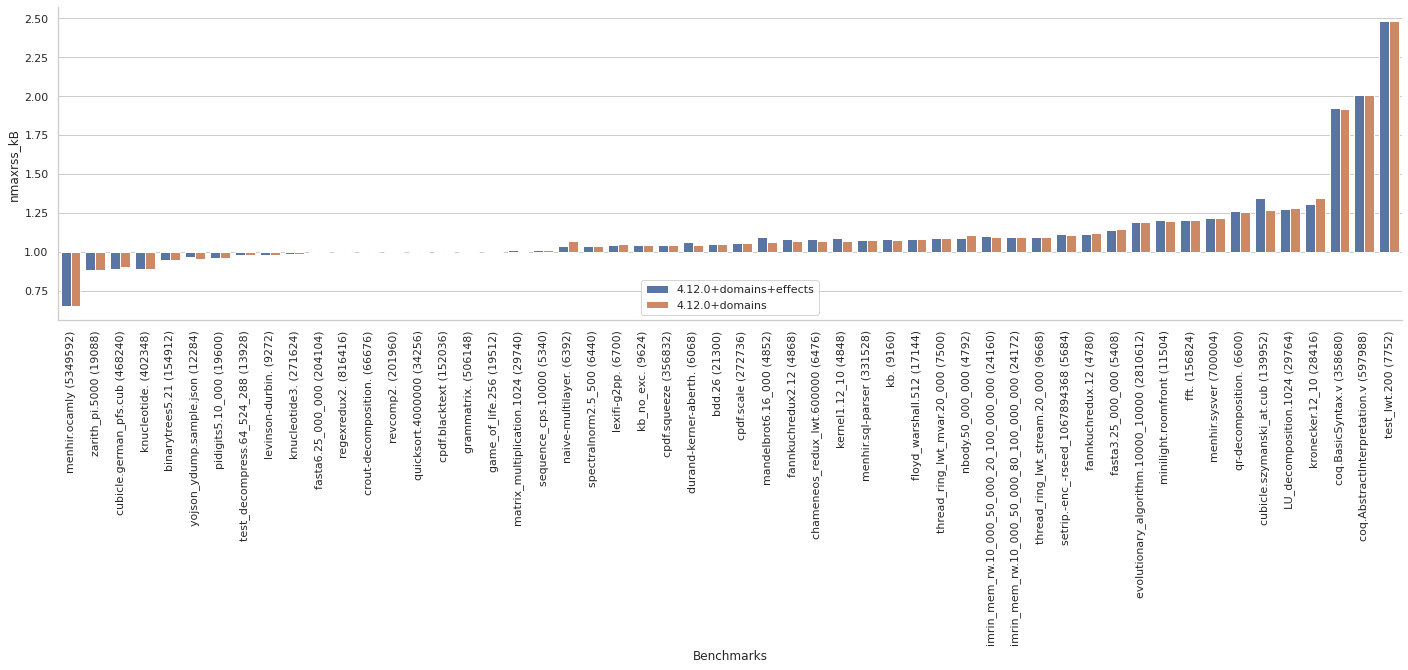

In [23]:
ndf = normalise(df,'4.12.0+stock','maxrss_kB')
plot_normalised(ndf,'4.12.0+stock','nmaxrss_kB')

## Major Collections

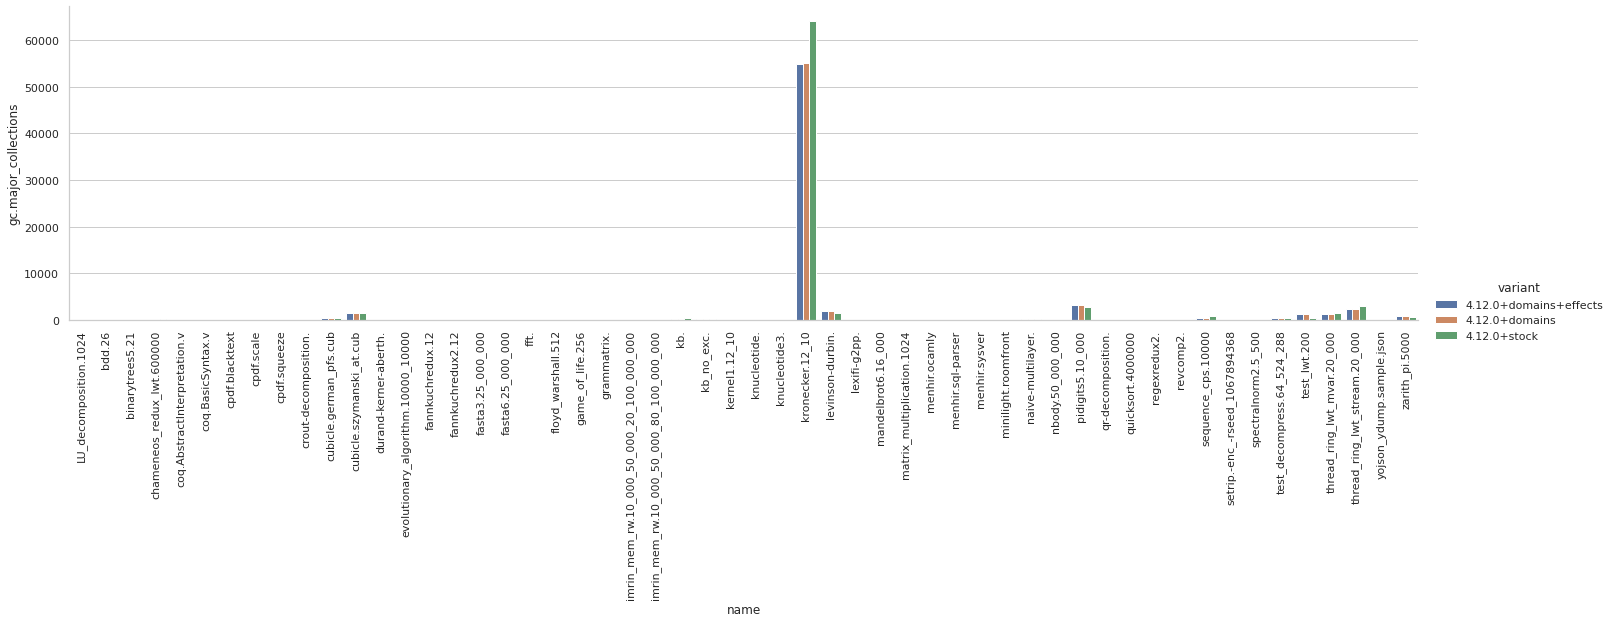

In [24]:
g = sns.catplot (x='name', y='gc.major_collections', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

<ipython-input-17-890d57e0b3eb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


,name,gc.major_collections,variant,display_name,bgc.major_collections,ngc.major_collections
30,LU_decomposition.1024,2,4.12.0+domains,LU_decomposition.1024 (4),4,0.500000
51,bdd.26,10,4.12.0+domains,bdd.26 (9),9,1.111111
34,binarytrees5.21,69,4.12.0+domains,binarytrees5.21 (63),63,1.095238
12,chameneos_redux_lwt.600000,57,4.12.0+domains,chameneos_redux_lwt.600000 (203),203,0.280788
24,coq.AbstractInterpretation.v,78,4.12.0+domains,coq.AbstractInterpretation.v (70),70,1.114286
54,coq.BasicSyntax.v,43,4.12.0+domains,coq.BasicSyntax.v (42),42,1.023810
10,cpdf.blacktext,14,4.12.0+domains,cpdf.blacktext (13),13,1.076923
16,cpdf.scale,28,4.12.0+domains,cpdf.scale (32),32,0.875000
4,cpdf.squeeze,32,4.12.0+domains,cpdf.squeeze (34),34,0.941176
0,crout-decomposition.,7,4.12.0+domains,crout-decomposition. (12),12,0.583333


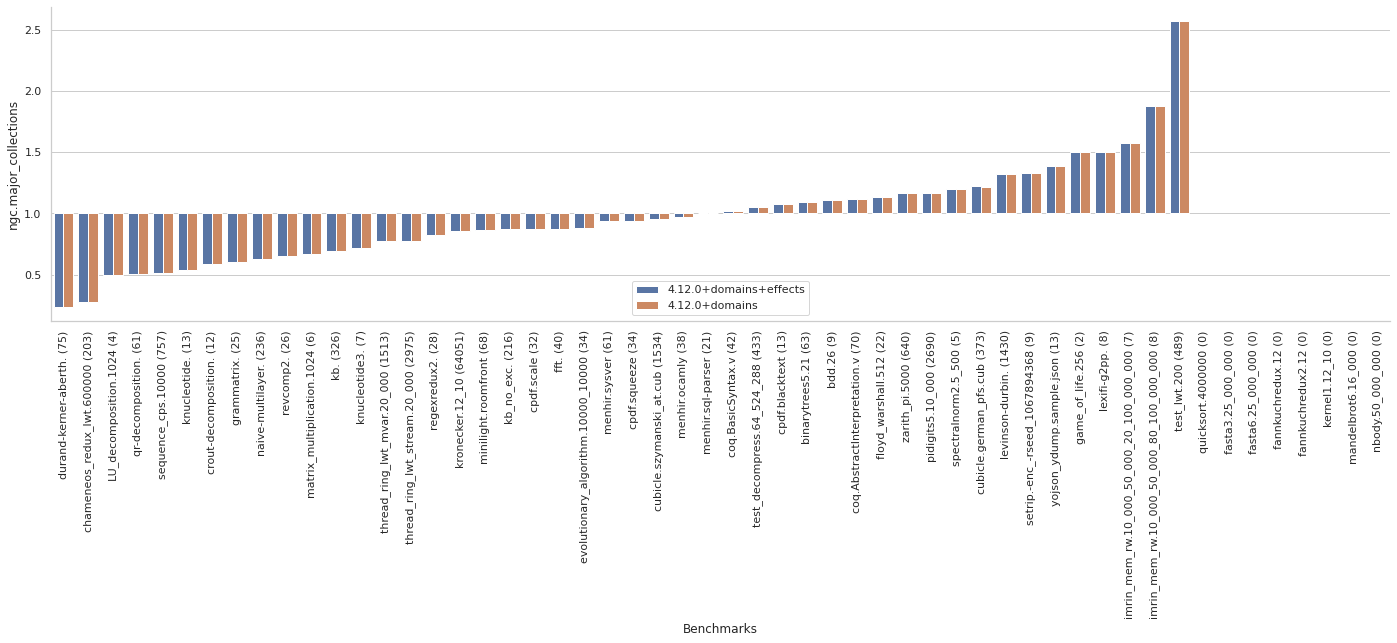

In [25]:
ndf = normalise(df,'4.12.0+stock','gc.major_collections')
plot_normalised(ndf,'4.12.0+stock','ngc.major_collections')
ndf

## Major words

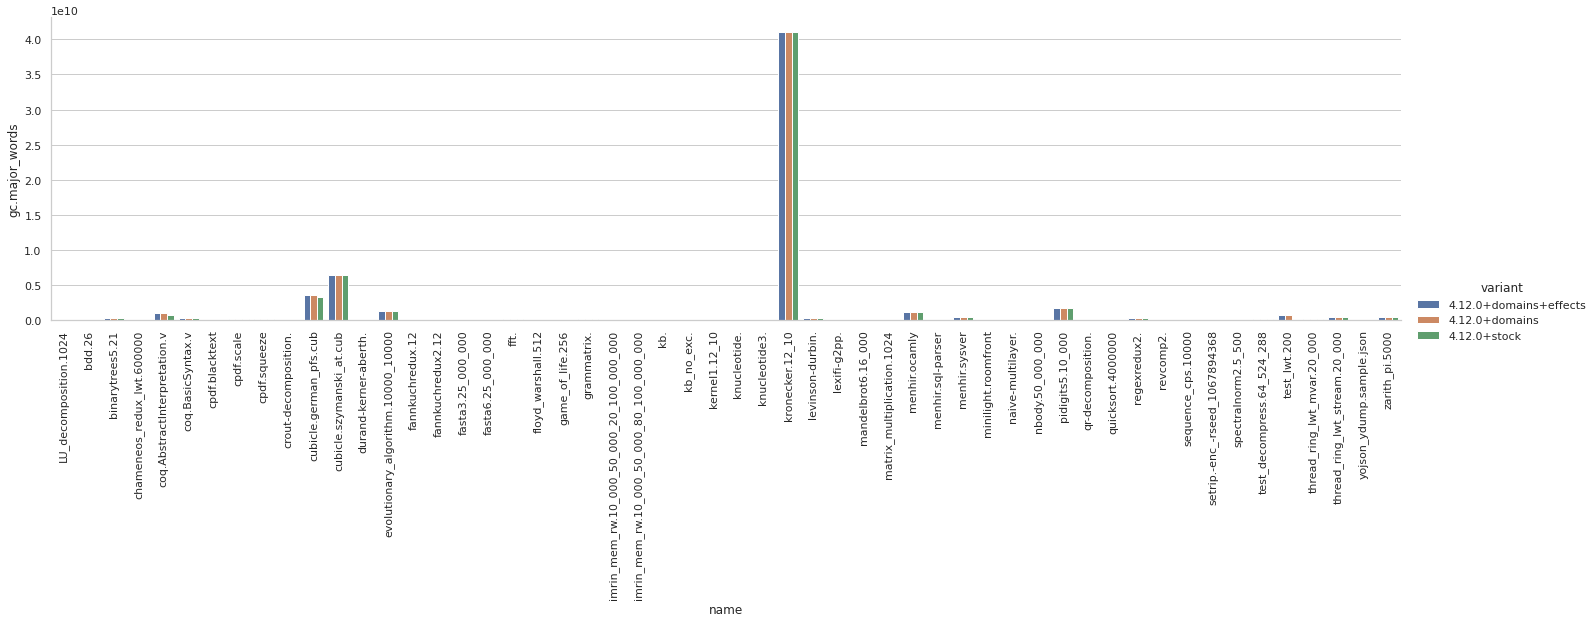

In [28]:
g = sns.catplot (x='name', y='gc.major_words', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

<ipython-input-17-890d57e0b3eb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


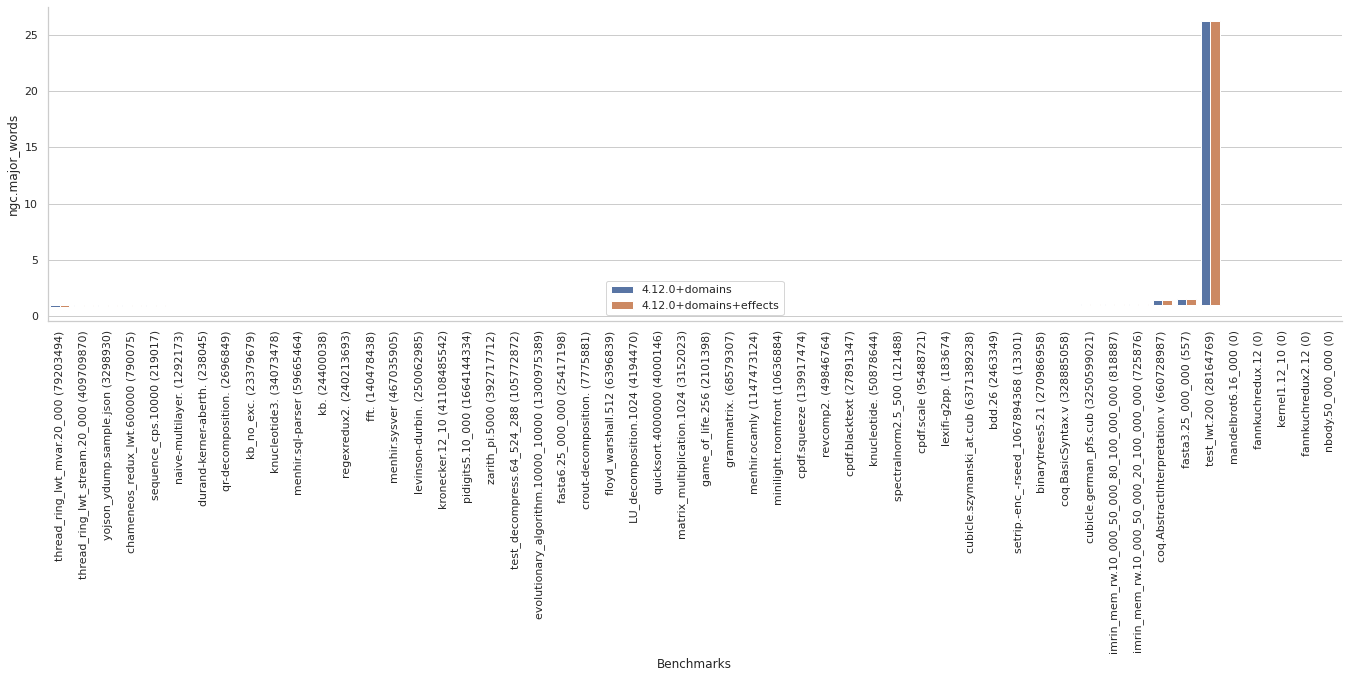

In [27]:
ndf = normalise(df,'4.12.0+stock','gc.major_words')
plot_normalised(ndf,'4.12.0+stock','ngc.major_words')

## Minor Collections

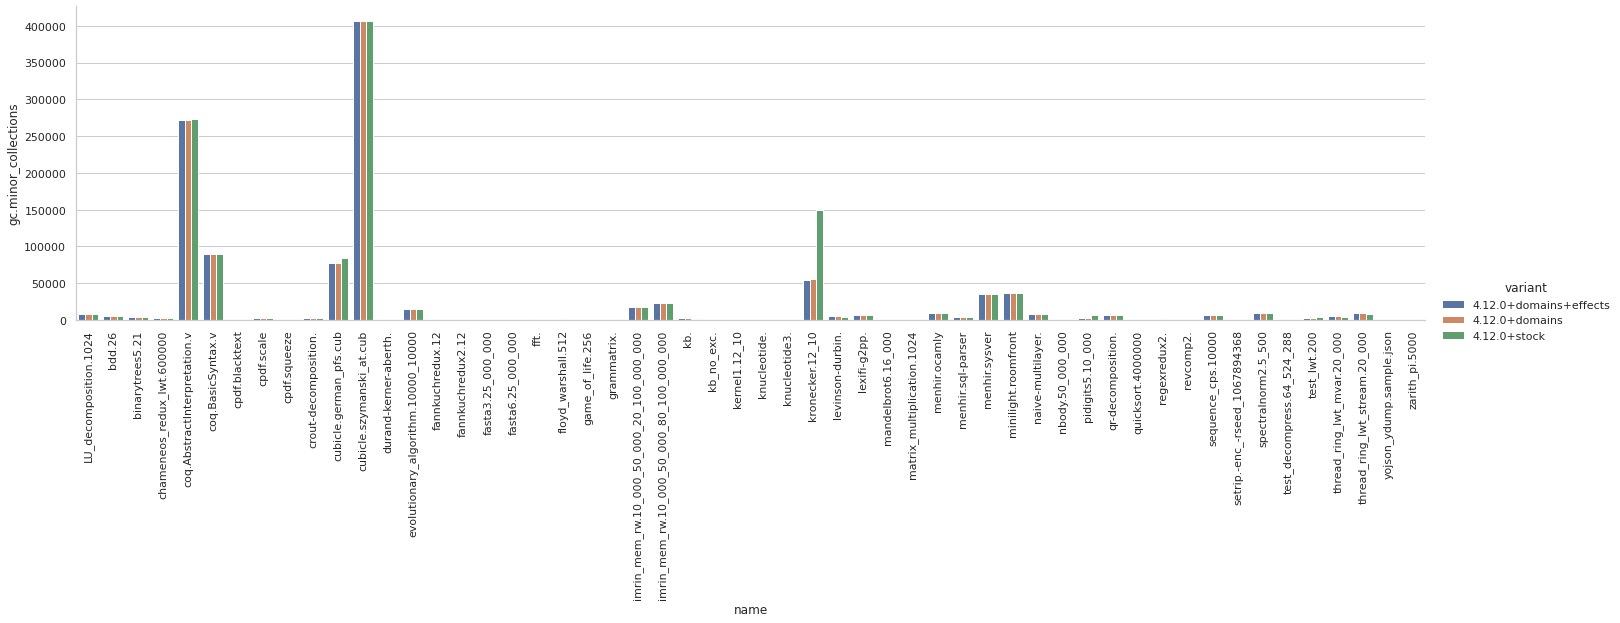

In [34]:
g = sns.catplot (x='name', y='gc.minor_collections', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

<ipython-input-17-890d57e0b3eb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


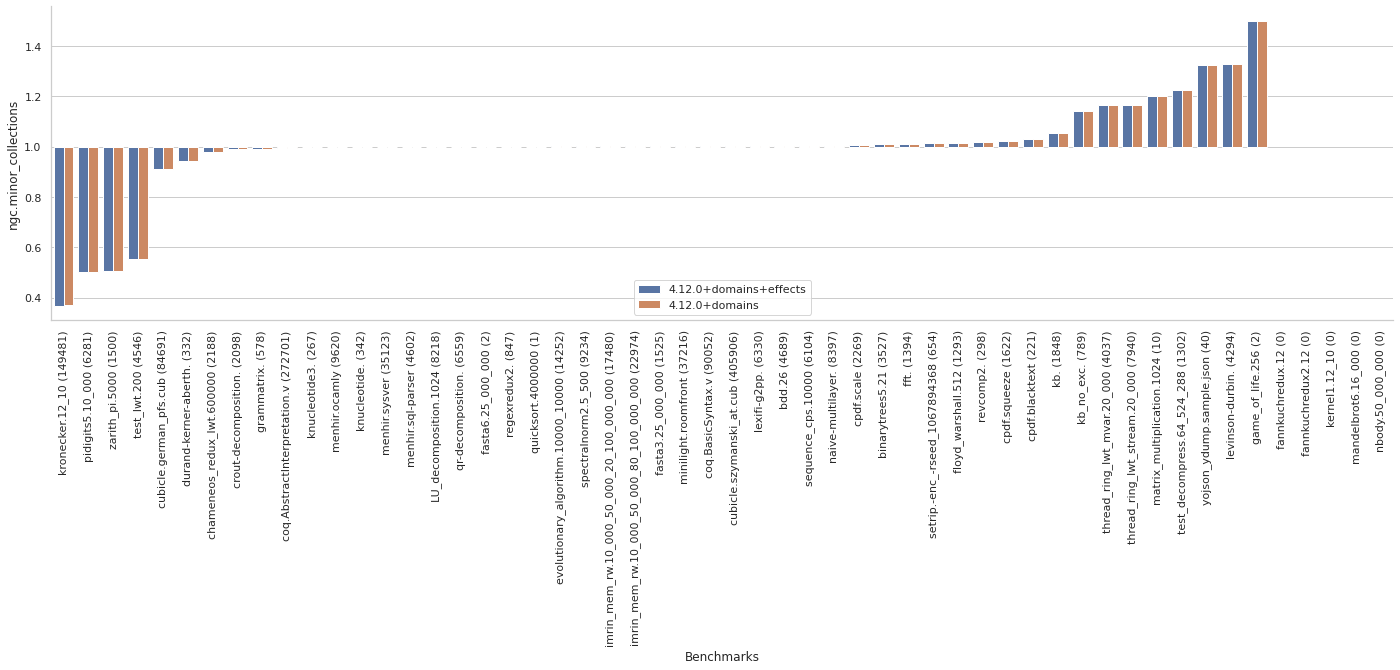

In [35]:
ndf = normalise(df,'4.12.0+stock','gc.minor_collections')
plot_normalised(ndf,'4.12.0+stock','ngc.minor_collections')

# Latency

In [36]:
data_frames = []

for file in glob.glob("*_1.pausetimes_*.bench"):
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        ldf = pdjson.json_normalize(data)
        ldf['variant'] = file.replace("_1.pausetimes_multicore.bench","").replace("_1.pausetimes_trunk.bench","")
        data_frames.append(ldf)

df2 = pd.concat(data_frames, sort=False)
df2 = df2.sort_values(['name'])

## Drop some benchmarks
df2 = df2[(df2.name != 'alt-ergo.fill.why') & #multicore version does not exist
        (df2.name != 'alt-ergo.yyll.why') & #multicore version does not exist
        (df2.name != 'frama-c.slevel') &    #multicore version does not exist
        (df2.name != 'js_of_ocaml.frama-c_byte') &    #multicore version does not exist
        (df2.name != 'cpdf.merge')]         #Not a macro benchmark. Will be removed from subsequent runs.
df2.count()
latency_df = df2
df2

<ipython-input-36-838a2c18826b>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  ldf = pdjson.json_normalize(data)


,name,mean_latency,max_latency,distr_latency,variant
19,LU_decomposition.1024,1.430908e+03,32065,"[1240, 1259, 1271, 1282, 1293, 1305, 1321, 134...",4.06.1+multicore+pausetimes
28,LU_decomposition.1024,1.415596e+03,16863,"[480, 502, 534, 822, 859, 887, 928, 3305, 3681...",4.06.1+stock+instrumented
19,LU_decomposition.1024,6.244134e+03,152543,"[6021, 6047, 6067, 6084, 6100, 6118, 6139, 617...",4.06.1+multicore+stw+pausetimes
45,bdd.26,1.790224e+04,7579387,"[1986, 2041, 2082, 2125, 2167, 2214, 2277, 238...",4.06.1+multicore+pausetimes
10,bdd.26,9.684711e+03,5184330,"[526, 571, 665, 1696, 1809, 1898, 2022, 3889, ...",4.06.1+stock+instrumented
45,bdd.26,2.204888e+04,7787502,"[6783, 6836, 6880, 6919, 6958, 7006, 7069, 718...",4.06.1+multicore+stw+pausetimes
40,binarytrees5.21,1.123347e+06,94869040,"[2027, 4622, 8625, 24961, 77237, 311440, 12281...",4.06.1+stock+instrumented
3,binarytrees5.21,2.513044e+06,20855307,"[1574, 5885, 14417, 33346, 131335, 664302, 277...",4.06.1+multicore+pausetimes
3,binarytrees5.21,2.604144e+06,21265507,"[6814, 12475, 20656, 42591, 150718, 711218, 30...",4.06.1+multicore+stw+pausetimes
8,chameneos_redux_lwt.600000,1.389608e+04,174618,"[2632, 5589, 9552, 12634, 15580, 17543, 18135,...",4.06.1+stock+instrumented


The latency distributions `distr_latency` are a list of latencies at `[10,20,30,40,50,60,70,80,90,95,99,99.9]`th percentiles.

## Max latency

In [37]:
df2.filter(["name","variant","max_latency"])

,name,variant,max_latency
19,LU_decomposition.1024,4.06.1+multicore+pausetimes,32065
28,LU_decomposition.1024,4.06.1+stock+instrumented,16863
19,LU_decomposition.1024,4.06.1+multicore+stw+pausetimes,152543
45,bdd.26,4.06.1+multicore+pausetimes,7579387
10,bdd.26,4.06.1+stock+instrumented,5184330
45,bdd.26,4.06.1+multicore+stw+pausetimes,7787502
40,binarytrees5.21,4.06.1+stock+instrumented,94869040
3,binarytrees5.21,4.06.1+multicore+pausetimes,20855307
3,binarytrees5.21,4.06.1+multicore+stw+pausetimes,21265507
8,chameneos_redux_lwt.600000,4.06.1+stock+instrumented,174618


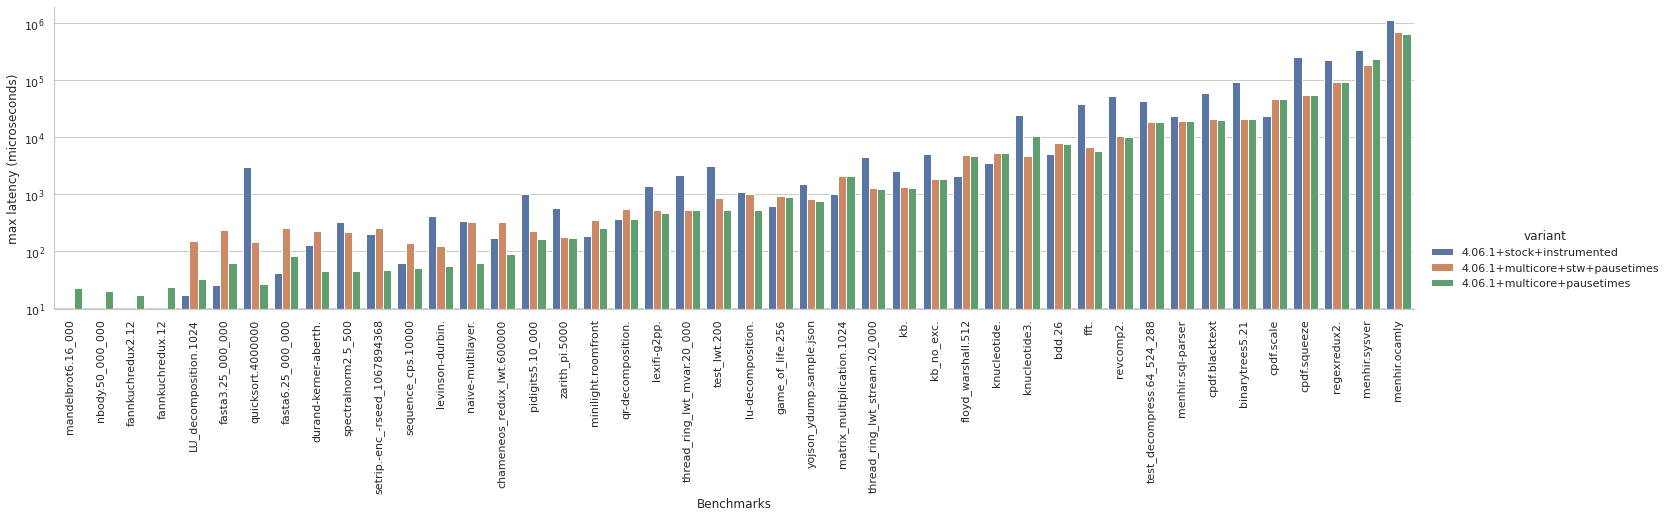

In [38]:
def plotLatencyAt(df,at,aspect):
    fdf = df.filter(["name","variant",at + "_latency"])
    fdf.sort_values(by=[at + '_latency'],inplace=True)
    fdf[at + "_latency"] = fdf[at + "_latency"] / 1000.0
    g = sns.catplot (x='name', y=at+'_latency', hue='variant', data = fdf, kind ='bar', aspect=aspect)
    g.set_xticklabels(rotation=90)
    g.ax.set_ylabel(at + " latency (microseconds)")
    g.ax.set_xlabel("Benchmarks")
    g.ax.set_yscale('log')
    return g

plotLatencyAt(df2,"max",4)

## 99.9th percentile latency

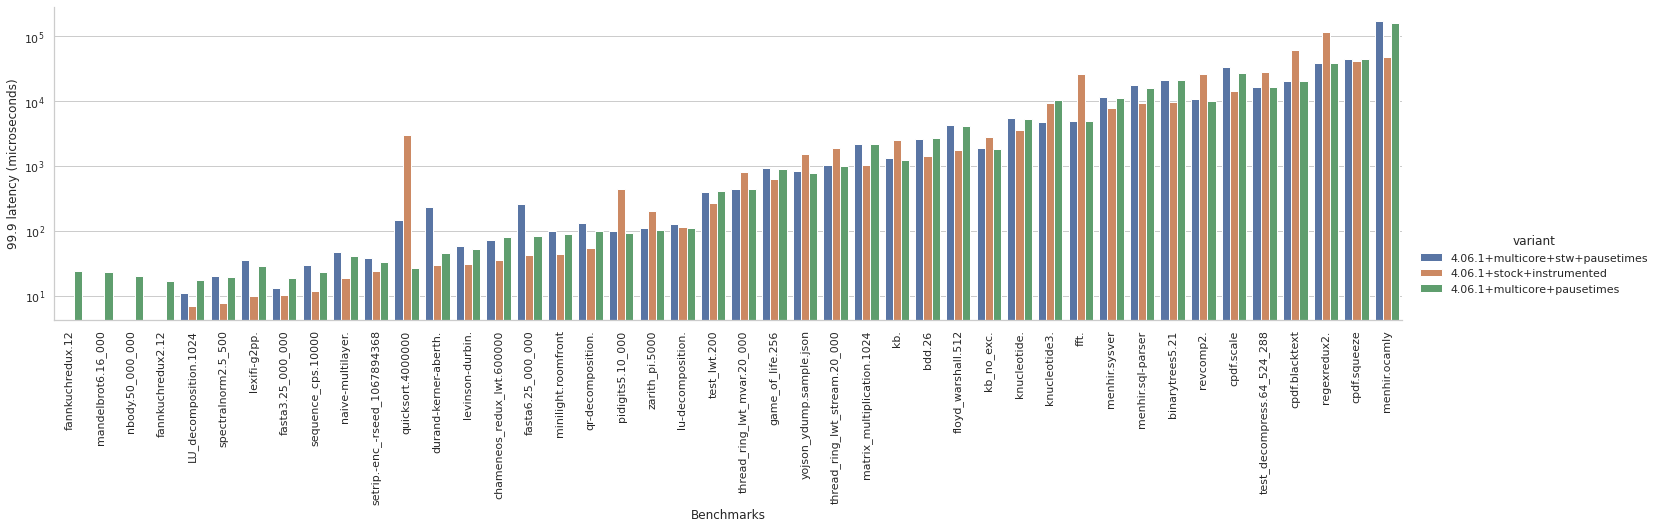

In [39]:
def getLatencyAt(df,percentile,idx):
    groups = df.groupby('variant')
    ndfs = []
    for group in groups:
        (v,df) = group
        for i, row in df.iterrows():
            df.at[i,percentile+"_latency"] = list(df.at[i,"distr_latency"])[idx]
        ndfs.append(df)
    return pd.concat(ndfs)

df2 = getLatencyAt(df2,"99.9",-1)
plotLatencyAt(df2,"99.9",4)

## 99th percentile latency

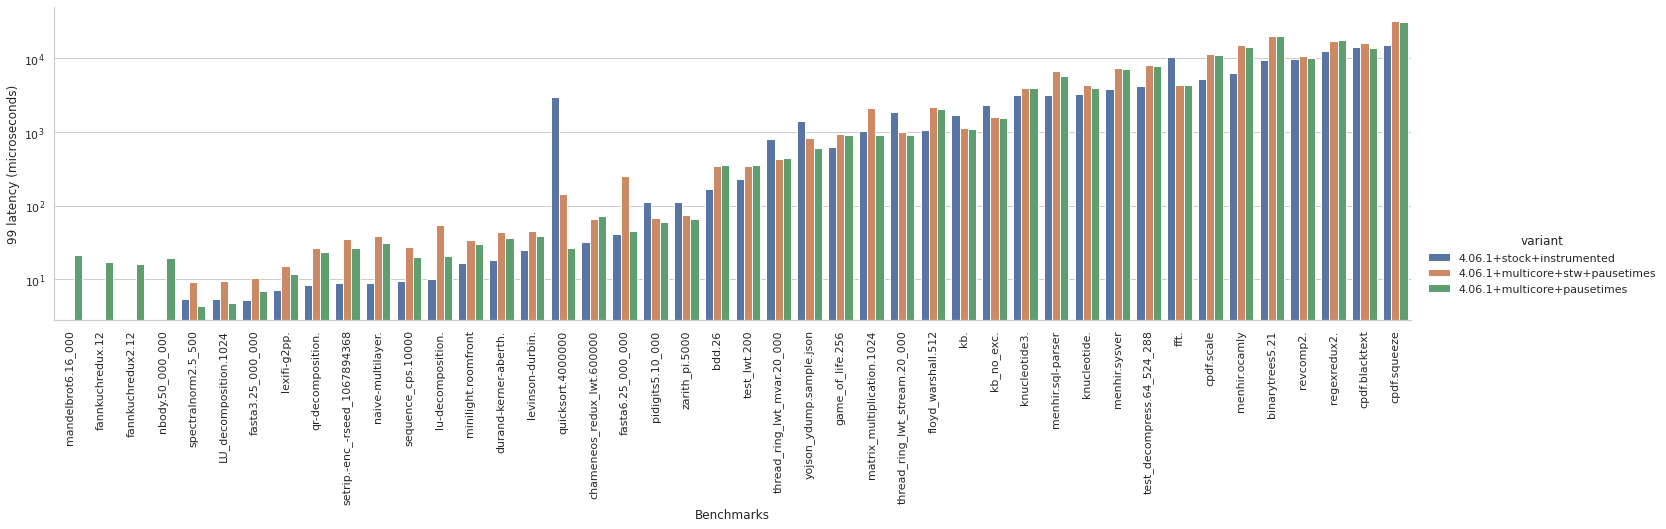

In [40]:
df2 = getLatencyAt(df2,"99",-2)
plotLatencyAt(df2,"99",4)